In [ ]:
!nvdia-smi

/bin/bash: line 1: nvdia-smi: command not found


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression

<h1 align='center' style='color:blue'>Crop yield predictions using ML OPS</h1>

In [ ]:
read = pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/pesticides.csv")
read.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
read_r= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/rainfall.csv")
read_r.sample(10)

,Area,Year,average_rain_fall_mm_per_year
4990,Romania,2017,637
3866,Malta,2009,560
2926,Isle of Man,1998,NaN
2165,French Polynesia,2013,NaN
649,Benin,2016,1039
2360,Greece,1990,652
506,Barbados,1996,1422
329,Australia,2006,534
2006,Ethiopia,2009,848
1553,Curacao,1989,NaN


In [ ]:
read_yield= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/yield.csv")
read_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
yield_read= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/yield_df.csv")
yield_read.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
read_t= pd.read_csv("C:/Users/USER/Desktop/Projects_git/Crop yield dataset/dataset/temp.csv")
read_t.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
# Data cleaning and preprocessing

#finding null values
print(yield_read.isnull().sum()) #rainfall has many errors on the average rainfall column


Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [ ]:
yield_read.info()
yield_read.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


### Part 1: EDA(exploratory Data analysis)

In [ ]:
#### We are renaming the Columns
#Unnamed: 0	Area	Item	Year	hg/ha_yield	average_rain_fall_mm_per_year	pesticides_tonnes	avg_temp
yield_read = yield_read.rename(columns={
    'hg/ha_yield': 'Yield_hg_per_ha',
    'Area': 'Area',
    'Item': 'Item',
    'Year': 'Year',
    'average_rain_fall_mm_per_year': 'Rainfall_mm',
    'pesticides_tonnes': 'Pesticides_tonnes',
    'avg_temp': 'Temperature_C'
})


In [ ]:
yield_read[['Yield_hg_per_ha', 'Rainfall_mm', 'Pesticides_tonnes', 'Temperature_C']].describe()


,Yield_hg_per_ha,Rainfall_mm,Pesticides_tonnes,Temperature_C
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,77053.332094,1149.05598,37076.909344,20.542627
std,84956.612897,709.81215,59958.784665,6.312051
min,50.000000,51.00000,0.040000,1.300000
25%,19919.250000,593.00000,1702.000000,16.702500
50%,38295.000000,1083.00000,17529.440000,21.510000
75%,104676.750000,1668.00000,48687.880000,26.000000
max,501412.000000,3240.00000,367778.000000,30.650000


### lets move to the : Visualization of elts we have

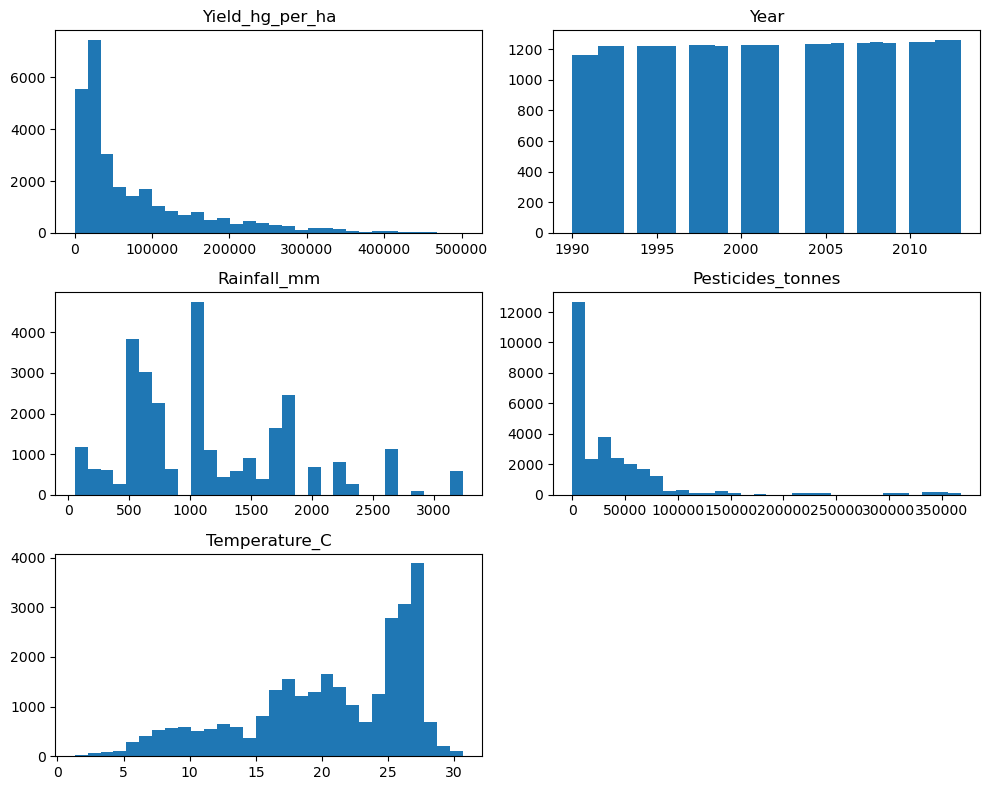

In [ ]:
features = ['Yield_hg_per_ha','Area', 'Year', 'Item', 'Rainfall_mm', 'Pesticides_tonnes', 'Temperature_C']

yield_read[features].hist(figsize=(10, 8), bins=30, grid=False)
plt.tight_layout()
plt.show()


### The correlation...

* Please note that *Area and Items* are only text not Numeric, that means we are going to be challenged *

C:\Users\USER\AppData\Local\Temp\ipykernel_19636\4017354679.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Yield_hg_per_ha', data=yield_read, ci=None)


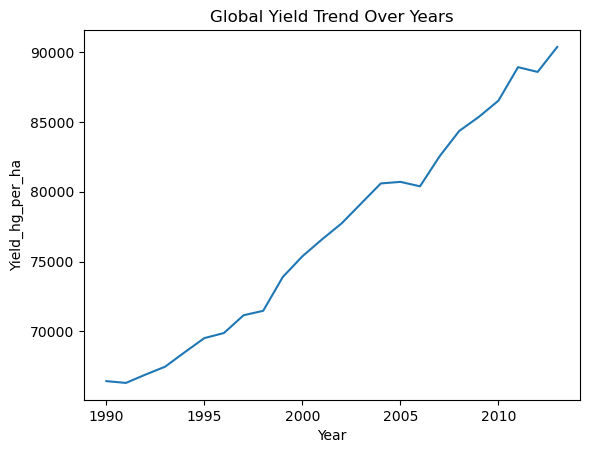

In [ ]:
import seaborn as sns
sns.lineplot(x='Year', y='Yield_hg_per_ha', data=yield_read, ci=None)
plt.title("Global Yield Trend Over Years")
plt.show()


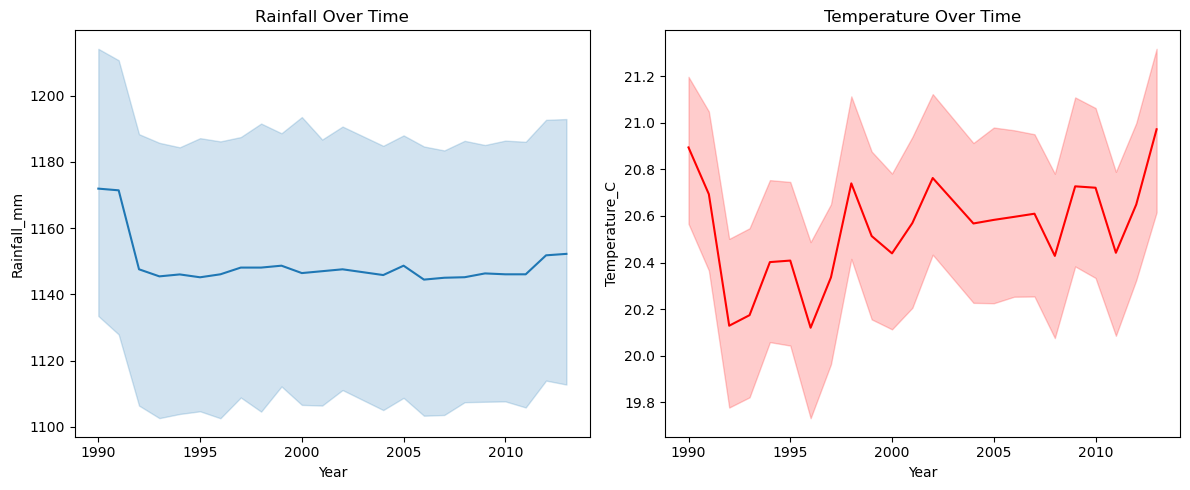

In [ ]:
# Create the figure and axes
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plot Rainfall
sns.lineplot(x='Year', y='Rainfall_mm', data=yield_read, ax=ax1)
ax1.set_title("Rainfall Over Time")

# Plot Temperature
sns.lineplot(x='Year', y='Temperature_C', data=yield_read, ax=ax2, color='r')
ax2.set_title("Temperature Over Time")

plt.tight_layout()
plt.show()


<Figure size 1300x1100 with 0 Axes>

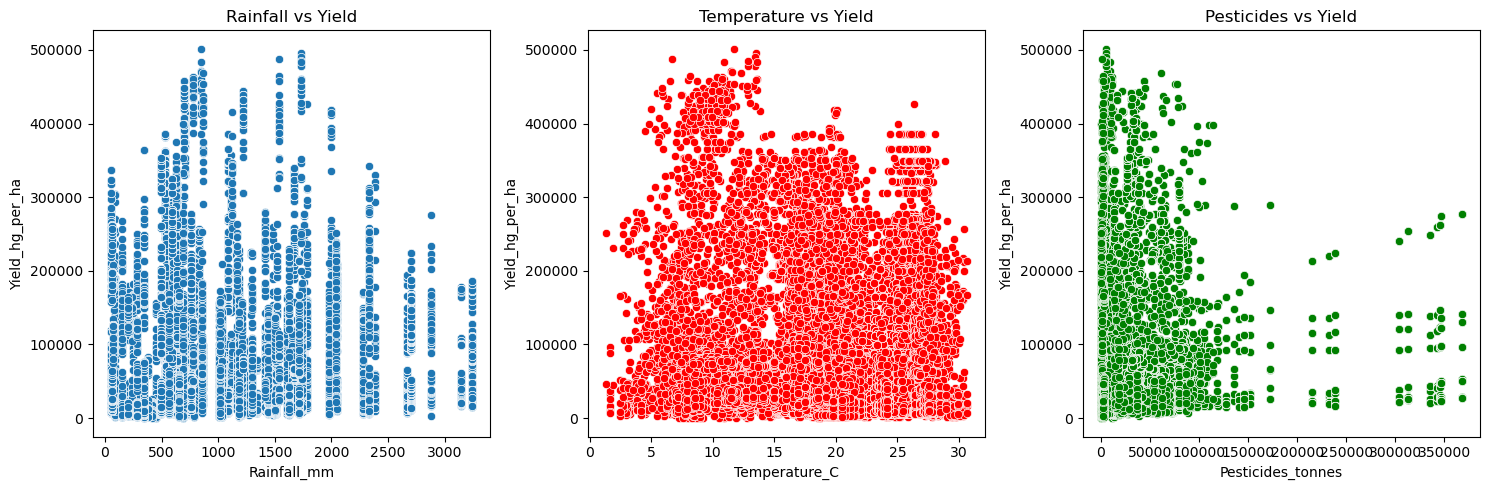

In [ ]:
# checking for NOn-linear plots
plt.figure(figsize=(13, 11))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(x='Rainfall_mm', y='Yield_hg_per_ha', data=yield_read, ax=ax[0])
sns.scatterplot(x='Temperature_C', y='Yield_hg_per_ha', data=yield_read, ax=ax[1], color='r')
sns.scatterplot(x='Pesticides_tonnes', y='Yield_hg_per_ha', data=yield_read, ax=ax[2], color='g')

ax[0].set_title("Rainfall vs Yield")
ax[1].set_title("Temperature vs Yield")
ax[2].set_title("Pesticides vs Yield")
plt.tight_layout()
plt.show()



- Country level Insights

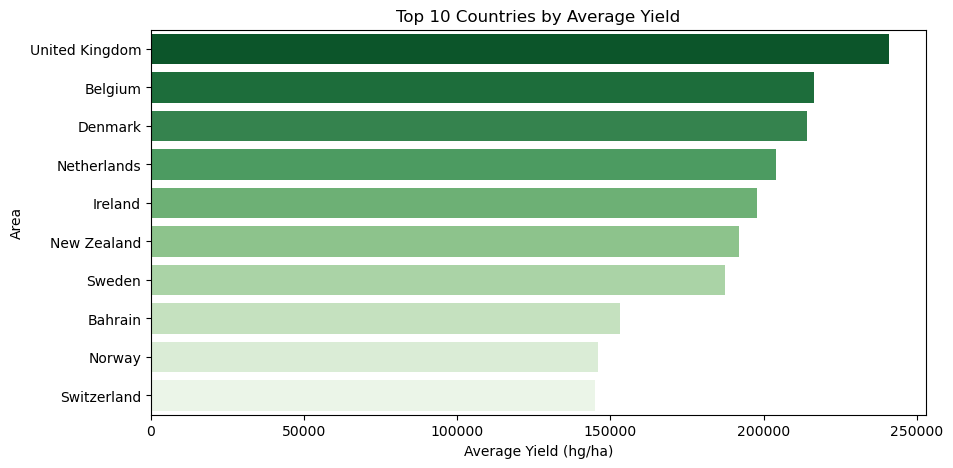

In [ ]:
# Average yield by country
country_yield = yield_read.groupby('Area')['Yield_hg_per_ha'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_yield.values, y=country_yield.index, palette='Greens_r')
plt.title("Top 10 Countries by Average Yield")
plt.xlabel("Average Yield (hg/ha)")
plt.show()


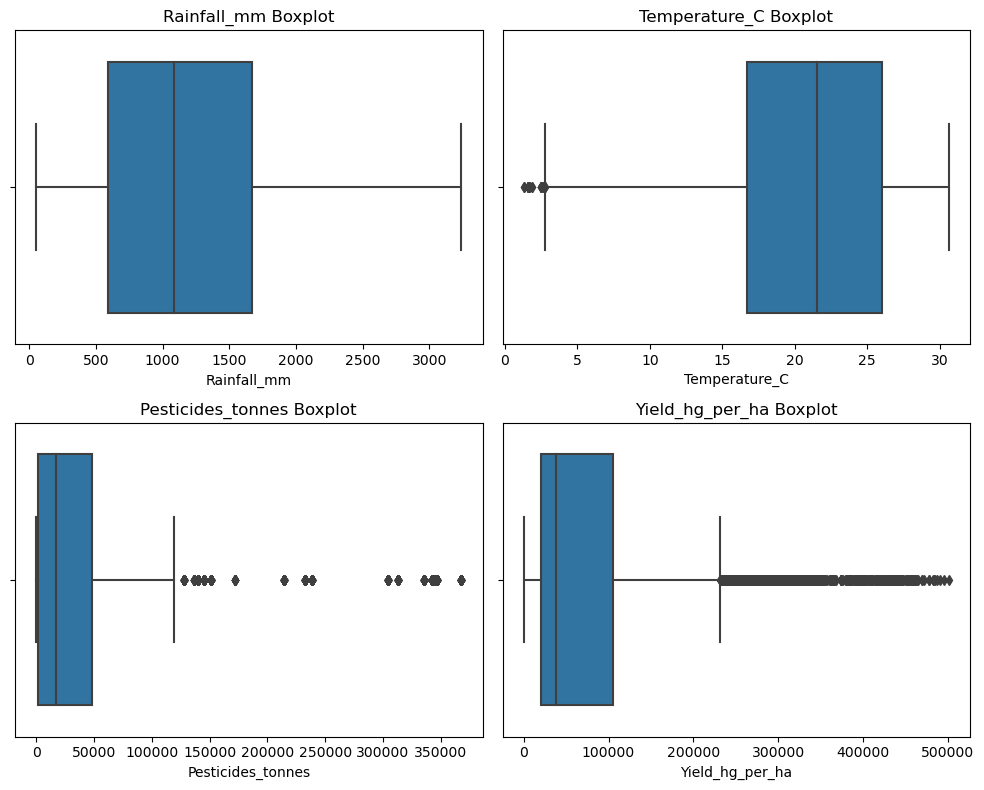

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Pre-create all subplots

columns = ['Rainfall_mm', 'Temperature_C', 'Pesticides_tonnes', 'Yield_hg_per_ha']

for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(x=yield_read[col], ax=ax)
    ax.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

#### You might notice curves or thresholds, things correlation can’t capture

#### Part 2: Data Processing and Feature Engineering

In [ ]:
#
yield_read.isnull().sum()

Unnamed: 0           0
Area                 0
Item                 0
Year                 0
Yield_hg_per_ha      0
Rainfall_mm          0
Pesticides_tonnes    0
Temperature_C        0
dtype: int64

In [ ]:
yield_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         28242 non-null  int64  
 1   Area               28242 non-null  object 
 2   Item               28242 non-null  object 
 3   Year               28242 non-null  int64  
 4   Yield_hg_per_ha    28242 non-null  int64  
 5   Rainfall_mm        28242 non-null  float64
 6   Pesticides_tonnes  28242 non-null  float64
 7   Temperature_C      28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


#### *Removing Outliers then..*

In [ ]:
def cap_outliers(yield_read, col):
    Q1 = yield_read[col].quantile(0.25)
    Q3 = yield_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    yield_read[col] = yield_read[col].clip(lower, upper)
    return yield_read

# Example: Cap outliers in Yield_hg_per_ha
yield_read = cap_outliers(yield_read, 'Yield_hg_per_ha')


In [ ]:
import numpy as np
yield_read['Pesticides_tonnes'] = np.log1p(yield_read['Pesticides_tonnes'])


In [ ]:
def remove_outliers_iqr(yield_read, col):
    Q1 = yield_read[col].quantile(0.25)
    Q3 = yield_read[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return yield_read[(yield_read[col] >= lower) & (yield_read[col] <= upper)]

# Example: Remove outliers from Pesticides_tonnes
yield_read_clean = remove_outliers_iqr(yield_read, 'Pesticides_tonnes')


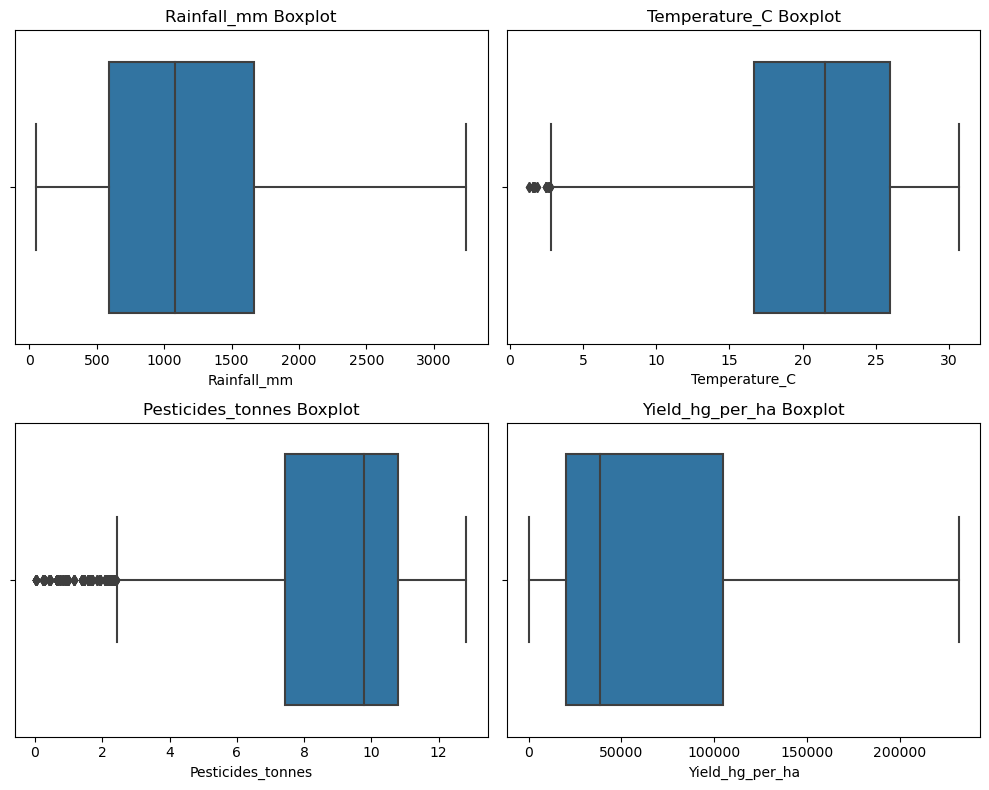

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Pre-create all subplots

columns = ['Rainfall_mm', 'Temperature_C', 'Pesticides_tonnes', 'Yield_hg_per_ha']

for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(x=yield_read[col], ax=ax)
    ax.set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

<Figure size 1300x1100 with 0 Axes>

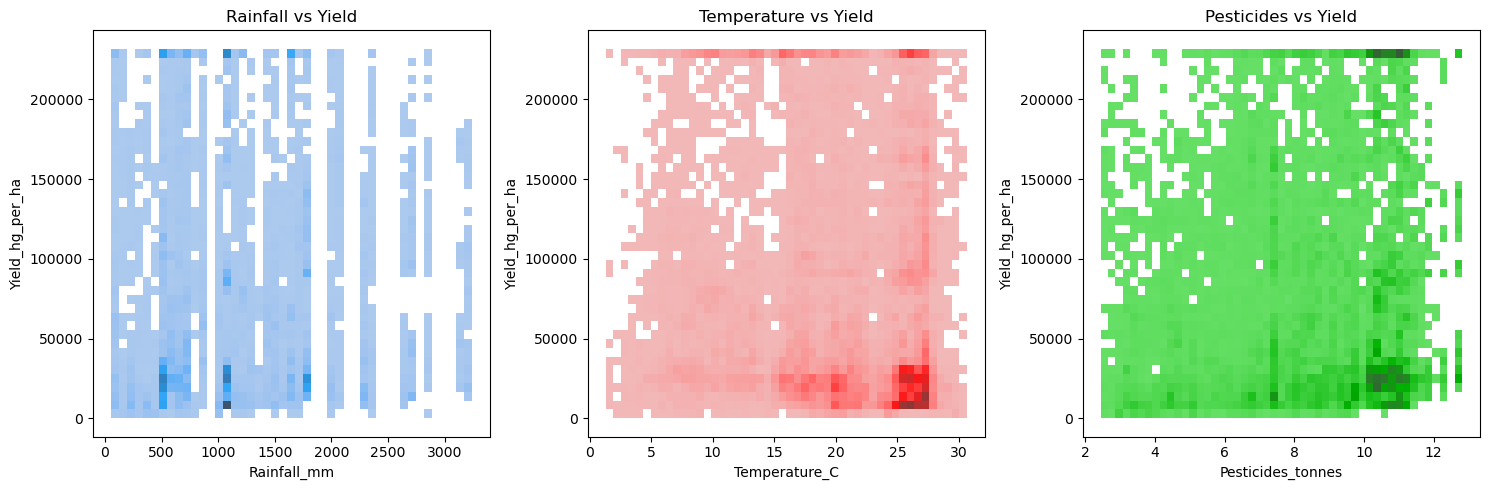

In [ ]:
# Drawing Features and its target
# Example: if your dataframe is named yield_df
plt.figure(figsize=(13, 11))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(x='Rainfall_mm', y='Yield_hg_per_ha', data=yield_read_clean, ax=ax[0])
sns.histplot(x='Temperature_C', y='Yield_hg_per_ha', data=yield_read_clean, ax=ax[1], color='r')
sns.histplot(x='Pesticides_tonnes', y='Yield_hg_per_ha', data=yield_read_clean, ax=ax[2], color='g')

ax[0].set_title("Rainfall vs Yield")
ax[1].set_title("Temperature vs Yield")
ax[2].set_title("Pesticides vs Yield")
plt.tight_layout()
plt.show()





##### Its Corrected, Excited

In [ ]:
categorical_cols = yield_read.select_dtypes(include=['object']).columns
print(categorical_cols)



## we are calling the Object guys(Area, and Item)

Index(['Area', 'Item'], dtype='object')


In [ ]:
yield_encoded = pd.get_dummies(yield_read, columns=['Area', 'Item'], drop_first=True)


In [ ]:
yield_encoded.head(3)

,Unnamed: 0,Year,Yield_hg_per_ha,Rainfall_mm,Pesticides_tonnes,Temperature_C,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Area_Zimbabwe,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,36613,1485.0,4.804021,16.37,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1990,66667,1485.0,4.804021,16.37,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1990,23333,1485.0,4.804021,16.37,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Scaling features using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Rainfall_mm', 'Temperature_C', 'Pesticides_tonnes', 'Yield_hg_per_ha']

scaler = MinMaxScaler()
yield_encoded[numerical_cols]= scaler.fit_transform(yield_encoded[numerical_cols])

## Part 4: Train, Test, Split

In [ ]:
X= yield_encoded.drop("Yield_hg_per_ha", axis=True)
y= yield_encoded['Yield_hg_per_ha']


X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(22593, 114)

##### Let us first try: 
* Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)


Linear Regression MSE: 0.018016863620753432
Linear Regression R2: 0.8030063335056863


- Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree MSE:", mse)
print("Decision Tree R2:", r2)


Decision Tree MSE: 0.001583033834708275
Decision Tree R2: 0.982691347070834


* Random Forest  Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest MSE:", mse)
print("Random Forest R2:", r2)


Random Forest MSE: 0.001583033834708275
Random Forest R2: 0.982691347070834


* XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost MSE:", mse)
print("XGBoost R2:", r2)


XGBoost MSE: 0.005128911330684223
XGBoost R2: 0.9439212579157291


#### We are going to fine tune using RandomSearch CV, for obtaining the best model, even though its obvious that its a Random regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Define the model
model_RF = RandomForestRegressor(random_state=42)

#Narrow grid and Few iterations
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=model_RF,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R2 (CV on tune set):", random_search.best_score_)

# Evaluate on test data
best_model = random_search.best_estimator_
best_model.set_params(n_jobs=-1)   # allow full-fit parallelism on the final model
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best R2 (CV on tune set): 0.9775972719705308
Test R2 Score: 0.9842641967027406


#### RandomizedSearch CV for Attempt 1: RandomizeSearch CV + XGBoost

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1) small tuning split (fast trials)
X_tune, X_val, y_tune, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 2) XGB model for tuning: n_jobs=1 to avoid nested parallelism, use fast 'hist' tree method
xgb_model = XGBRegressor(
    random_state=42,
    n_jobs=1,
    objective='reg:squarederror',
     # faster on CPU; use 'gpu_hist' if GPU available
    verbosity=0
)

# 3) narrower param space + fewer iterations
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,            # reduce from 50
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1             # parallelize trials across cores
)

# 4) Fit with early stopping (pass eval_set and early_stopping_rounds to estimator.fit)
random_search_xgb.fit(
    X_tune, y_tune,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=False
)

print("Best Parameters:", random_search_xgb.best_params_)
print("Best R2 (CV on tuning set):", random_search_xgb.best_score_)

# 5) Retrain best estimator on full training set (allow parallelism)
best_xgb = random_search_xgb.best_estimator_
best_xgb.set_params(n_jobs=-1)
best_xgb.fit(X_train, y_train)   # no early stopping here or optionally use a small validation split

y_pred_xgb = best_xgb.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
# ...existing code...

Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'


#### Attempt 2 — Linear Regression + XGB comparison

In [ ]:

# 2️⃣ XGBoost (reuse best_xgb from Attempt 1 or train fresh)
xgb_model2 = XGBRegressor(
    n_estimators=200,       # or use best params from Attempt 1
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model2.fit(X_train, y_train)
y_pred_xgb2 = xgb_model2.predict(X_test)

print("\n XGBoost Performance:")
print("R2 Score:", r2_score(y_test, y_pred_xgb2))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb2)))




📌 XGBoost Performance:
R2 Score: 0.9500369116343521
MAE: 0.04248689382092823
RMSE: 0.06759866226603417


In [ ]:
class_counts = yield_read['Rainfall_mm'].value_counts()
class_proportions = yield_read['Rainfall_mm'].value_counts(normalize=True) * 100

##### Using Optuna for Model Fine tuning
* optuna is better than Grid search cv or  RandomizeCV because it employs advanced techniques such as Gradient optimization, bayesian optimization, and evolutionary algorithms to efficiently identify the optimal parameters.

- Compared to other Tuning, optuna offers a more effective solution

In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error']), #which one best meets goodness 
        'splitter': trial.suggest_categorical('splitter', ['best', 'random'])
    }

    model = DecisionTreeRegressor(**params, random_state=42)

    # Use cross-validation to evaluate
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
    return np.mean(scores)

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)
print("Best R2 Score from CV:", study.best_value)

# Train final model with best params
best_params = study.best_params
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred))



[I 2025-11-06 17:23:15,060] A new study created in memory with name: no-name-4ce17ddc-eda2-4d01-8bbe-6eca072db569
[I 2025-11-06 17:23:36,197] Trial 0 finished with value: 0.9534183170341016 and parameters: {'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 9, 'criterion': 'friedman_mse', 'splitter': 'random'}. Best is trial 0 with value: 0.9534183170341016.
[I 2025-11-06 17:23:49,255] Trial 1 finished with value: 0.9435387587120591 and parameters: {'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 6, 'criterion': 'squared_error', 'splitter': 'random'}. Best is trial 0 with value: 0.9534183170341016.
